<a href="https://colab.research.google.com/github/Harshcs2002/Bharat-Intern-Task-2-Wine-Quality-Prediction/blob/main/WineQualityLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Wine Quality Prediction : Machine Learning model to predict the quality of wine using linear regression only Jupyter notebook code.

### Import modules

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
%matplotlib inline

### Load the dataset

In [2]:
# Read the dataset
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
# Visualize the first ten rows of the dataset
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Analyze the dataset

In [4]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# Check for object data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Get descriptive statistics of the dataset
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory Data Analysis

In [7]:
# Count the frequency of each quality value
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

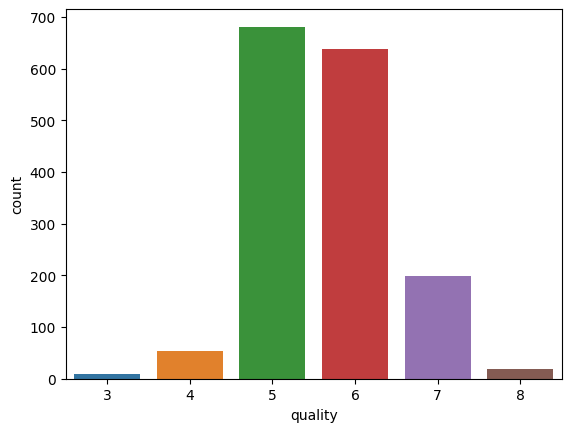

In [8]:
# Plot the count of each quality value
sns.countplot(x=df["quality"])

In [9]:
# Count the total number of rows
df.count()

fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [10]:
# Calculate and order the correlations with respect to quality
correlations = df.corr()["quality"].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

<Axes: >

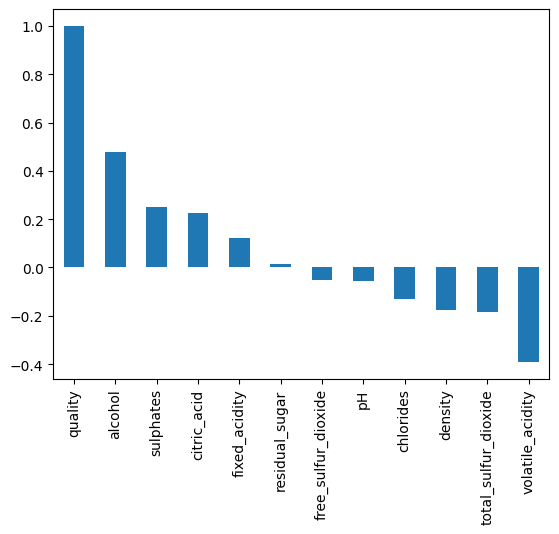

In [11]:
# Plot the correlations
correlations.plot(kind="bar")

<Axes: >

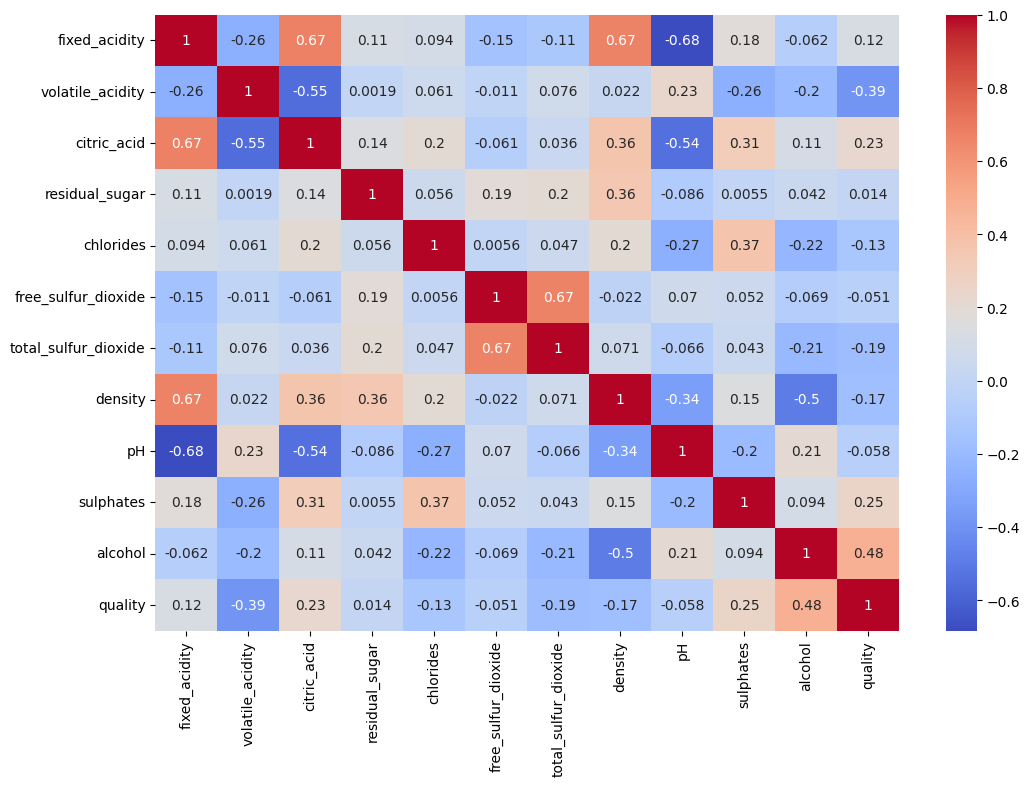

In [12]:
# Heatmap to plot all correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [13]:
# Print features with correlations greater than 0.2
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


### Alcohol percent in different quality wines

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

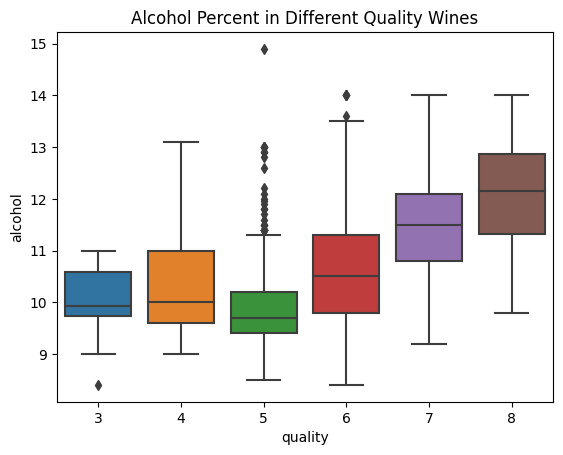

In [14]:
# Box plot of alcohol percent in different quality wines
alc = sns.boxplot(x="quality", y="alcohol", data=df)
alc.set(title="Alcohol Percent in Different Quality Wines")

### Sulphates percent in different quality wines

[Text(0.5, 1.0, 'Sulphates Percent in Different Quality Wines')]

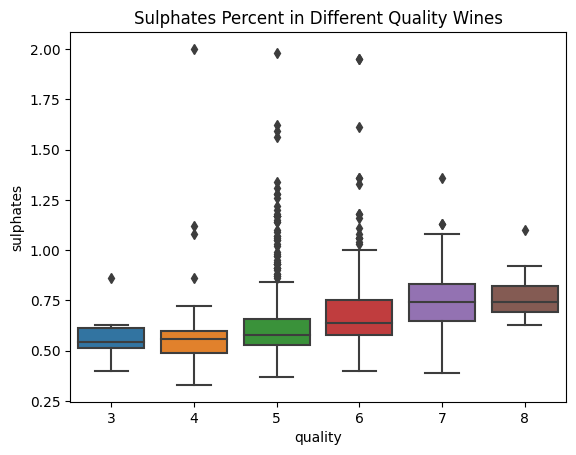

In [15]:
# Box plot of sulphates percent in different quality wines
sp = sns.boxplot(x="quality", y="sulphates", data=df)
sp.set(title="Sulphates Percent in Different Quality Wines")

### Citric acid percent in different quality wines

[Text(0.5, 1.0, 'Citric Acid Percent in Different Quality Wines')]

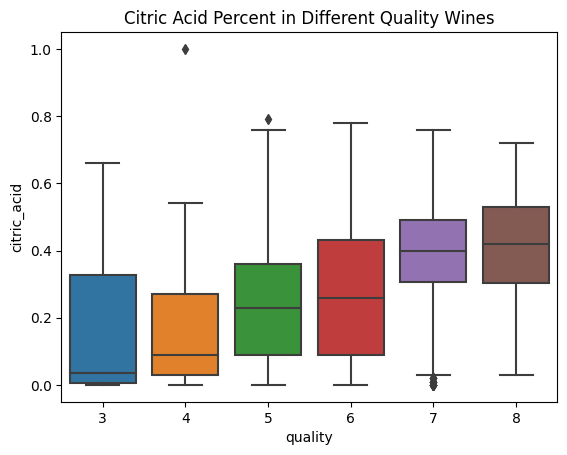

In [16]:
# Box plot of citric acid percent in different quality wines
cit = sns.boxplot(x="quality", y="citric_acid", data=df)
cit.set(title="Citric Acid Percent in Different Quality Wines")

### Volatile acid percent in different quality wines

[Text(0.5, 1.0, 'Volatile Acidity Percent in Different Quality Wines')]

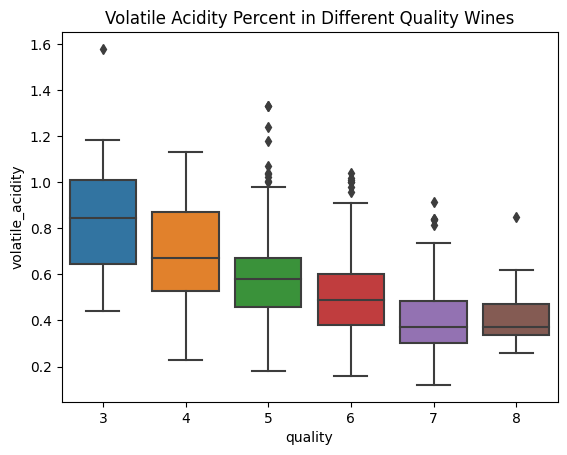

In [17]:
# Box plot of volatile acidity percent in different quality wines
vol = sns.boxplot(x="quality", y="volatile_acidity", data=df)
vol.set(title="Volatile Acidity Percent in Different Quality Wines")

### Features Selection

In [18]:
# Function to get correlated features above a threshold
def get_correlation(data, threshold):
    corr_col = []
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                if col_name not in corr_col:
                    corr_col.append(col_name)
    return corr_col

In [19]:
# Split the dataset into features (x) and target variable (y)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [21]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Split the data into training and testing datasets

In [22]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
# Get correlated features above a threshold (0.6)
corr_features = get_correlation(x_train, 0.6)
corr_features

['citric_acid', 'total_sulfur_dioxide', 'density', 'pH']

In [24]:
# Drop correlated features from training and testing sets
x_train.drop(corr_features, axis=1)
x_test.drop(corr_features, axis=1)

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol
1109,10.8,0.470,2.10,0.171,27.0,0.76,10.8
1032,8.1,0.820,4.10,0.095,5.0,0.53,9.6
1002,9.1,0.290,2.05,0.063,13.0,0.84,11.7
487,10.2,0.645,1.80,0.053,5.0,0.42,10.0
979,12.2,0.450,1.40,0.075,3.0,0.63,10.4
...,...,...,...,...,...,...,...
794,10.1,0.270,2.30,0.065,7.0,0.53,12.5
813,6.9,0.390,2.10,0.102,4.0,0.58,11.4
1322,9.1,0.340,1.80,0.058,9.0,0.55,11.4
704,9.1,0.765,1.60,0.078,4.0,0.54,9.7


### Features scaling

In [25]:
# Perform feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

In [26]:
# Display the target variable of the training set
y_train

642     5
679     5
473     5
390     8
1096    6
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1279, dtype: int64

### Applying Linear Regression model

In [27]:
# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [28]:
# Make predictions using the testing set
y_pred = linear_reg.predict(x_test)
print(y_pred[:100])
y_pred = np.round(y_pred)

[5.76385478 4.98006946 6.64102493 5.27480699 5.93051034 4.95805557
 5.35105778 6.0594488  4.76558558 4.89268871 5.24932617 5.36800084
 5.68031947 5.0197175  5.51062764 6.41821707 6.83304011 5.71301548
 5.92193484 5.05501536 6.31417929 5.12991229 5.60598355 6.16576906
 5.4803782  4.93702179 5.13198248 6.51165656 5.29938172 6.28012667
 6.04884564 5.8237069  5.54373934 5.25886212 5.67621688 6.17757069
 5.13017354 5.52654811 6.39221706 5.75787899 5.39872148 6.06137627
 6.68743062 6.63429619 5.95888107 4.69146177 5.46197404 6.01848535
 5.46398874 6.10714487 5.30188276 5.27369029 5.79126048 6.34779126
 5.73410733 5.20017687 5.02744333 5.27115977 6.52689639 5.43550358
 5.14677243 5.74906082 6.04569753 6.26498692 5.02770371 6.12493522
 5.30526479 6.00106148 6.12865961 5.95517256 5.2948336  5.47729398
 4.9938974  5.55870363 5.59846992 6.22759332 5.37672307 5.28182758
 5.73271578 6.33180342 5.68078348 5.263103   5.903888   6.07235053
 5.46630304 5.34664952 6.23683579 4.99751831 5.29853871 4.9154

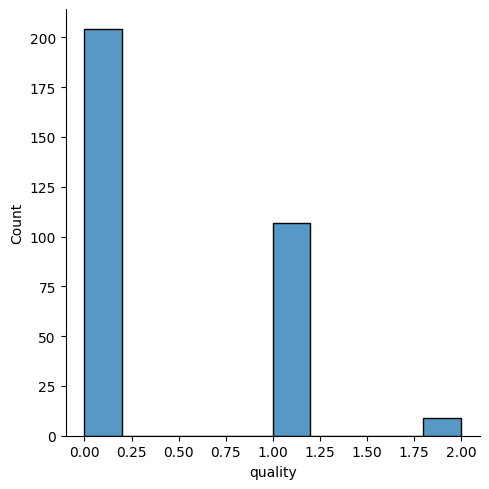

In [29]:
# Plot the absolute error between predicted and test label values
sns.displot(abs(y_test - y_pred))

### Accuracy of Linear Regression Model

In [30]:
# Evaluate the model
print('Mean Absolute Error     : ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error     :  0.390625
Root Mean Squared Error :  0.625


In [31]:
# Calculate the accuracy of the linear regression model
acc_score = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy of the Linear Regression model = ", acc_score, "%")

Accuracy of the Linear Regression model =  63.75 %


In [32]:
# Create a confusion matrix
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  6,  5,  0,  0],
       [ 0,  0, 98, 37,  0,  0],
       [ 0,  0, 37, 98,  7,  0],
       [ 0,  0,  1, 18,  8,  0],
       [ 0,  0,  0,  1,  2,  0]])

<Axes: >

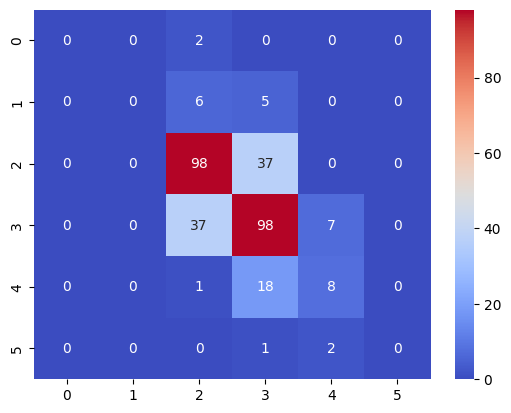

In [33]:
# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="coolwarm")